In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import soaplite
import genBasis
import ase
from ase.visualize import view
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as p
from numpy.linalg import norm
from scipy.optimize import fmin
import scipy.optimize as op
import time
%matplotlib inline

In [16]:
atoms1 = ase.io.read(currentdir + "/Structs/au80.xyz")
atoms1.set_cell(10 * np.identity(3))
atoms1.center()
#view(atoms1)

atoms2 = ase.io.read(currentdir + "/Structs/au40cu40.xyz")
atoms2.set_cell(10 * np.identity(3))
atoms2.center()
#view(atoms2)

atoms3 = ase.io.read(currentdir + "/Structs/au40Cu39Ti1.xyz")
atoms3.set_cell(10 * np.identity(3))
atoms3.center()
#view(atoms2)

atoms4 = ase.io.read(currentdir + "/Structs/diamond.xyz")
atoms4.set_cell(10 * np.identity(3))
atoms4.center()
view(atoms4)

In [35]:
type(atoms4)

ase.atoms.Atoms

In [56]:
files = np.array(["/glass_cube_CuZr.cfg","/Structs/au80.xyz","/Structs/au40cu40.xyz","/Structs/au40Cu39Ti1.xyz","/Structs/diamond.xyz","/Structs/mos2_51.xyz"])


In [13]:
def num_atoms(atoms):
    return(len(atoms.get_positions()))

nuber of atoms sample: 207
shape of matrix: (207, 270)


/users/stud/bechtelt/BA/code/soaplite.py:49: RuntimeWarning: divide by zero encountered in true_divide
  cell_images = np.ceil(rCutHard/xyz_arr)


OverflowError: cannot convert float infinity to integer

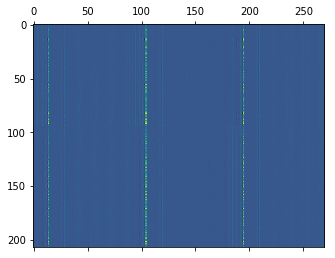

In [62]:
Hpos1 = atoms1[-1].position

rCut = 10.0
NradBas = 5
Lmax = 5
myAlphas, myBetas = genBasis.getBasisFunc(rCut, NradBas) # input: (rCut, NradBas)
for i in np.arange(len(files)):
    atoms = ase.io.read(currentdir + files[i])
    y = soaplite.get_periodic_soap_structure(atoms, myAlphas, myBetas, rCut, NradBas, Lmax)
    p.matshow(y)
    print('nuber of atoms sample: %i' %num_atoms(atoms))
    print('shape of matrix: %s' %(np.shape(y),))
    view(atoms)


In [66]:
diamond = ase.io.read(currentdir + "/Structs/diamond.xyz")
diamond.get_cell()
#soaplite.get_periodic_soap_structure(diamond, myAlphas, myBetas, rCut, NradBas, Lmax)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])